# 2 Predição de preços de diamantes

In [63]:
# Importando os pacotes

import pandas as pd # Utilização de datasets
import matplotlib.pyplot as plt # Visualização dos gráficos
import numpy as np # Utilização de analise de dados
from sklearn.preprocessing import StandardScaler # Normalização dados

# Modelos e Analises
from sklearn.model_selection import train_test_split # Treino e Testes
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
# Importando o Dataset: Sobre este arquivo. Um quadro de dados com 53940 linhas e 10 variáveis: preço a preço

In [65]:
df_diam = pd.read_csv('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/diamonds.csv')

In [66]:
df_diam.shape

(53940, 11)

In [50]:
df_diam.head(4)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


In [51]:
# Ajustando dataset, devido a uma coluna anônima.

In [52]:
df_diam = df_diam.drop(columns=["Unnamed: 0"])

In [53]:
df_diam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [54]:
df_diam.isnull().sum().sum() #checando a existência de valores nulos

0

#### Observamos que as variáveis corte, cor e claridade são dados categóricos, segundo o descritivo no site "kaggle.com/datasets. Sendo eles: corte (Fair, Good, Very Good, Premium, Ideal), cor diamante, de J (pior) a D (melhor) e clareza uma medida de quão claro é o diamante (I1 (pior), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (melhor))

In [67]:
categories = {col: df_diam[col].astype('category').cat.categories for col in ['cut', 'color', 'clarity']}
print(categories)

{'cut': Index(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype='object'), 'color': Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object'), 'clarity': Index(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'], dtype='object')}


In [68]:
# Transformando as colunas e mapeamento personalizado
mapeamento_cut = {'Ideal': 4, 'Premium': 3, 'Very Good': 2, 'Good': 1, 'Fair': 0}
mapeamento_color = {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}
mapeamento_clarity = {'IF': 7, 'VVS1': 6, 'VVS2': 5, 'VS1': 4, 'VS2': 3, 'SI1': 2, 'SI2': 1, 'I1': 0}

# Aplicando o mapeamento às colunas do Dataset
df_diam['cut'] = df_diam['cut'].map(mapeamento_cut)
df_diam['color'] = df_diam['color'].map(mapeamento_color)
df_diam['clarity'] = df_diam['clarity'].map(mapeamento_clarity)


In [69]:
# Transformando em inteiros
df_diam['cut'] = df_diam['cut'].astype(int)
df_diam['color'] = df_diam['color'].astype(int)
df_diam['clarity'] = df_diam['clarity'].astype(int)

unique_cut = df_diam['cut'].unique()
unique_color = df_diam['color'].unique()
unique_clarity = df_diam['clarity'].unique()

print("'cut':", sorted(unique_cut))
print("'color':", sorted(unique_color))
print("'clarity':", sorted(unique_clarity))


'cut': [0, 1, 2, 3, 4]
'color': [0, 1, 2, 3, 4, 5, 6]
'clarity': [0, 1, 2, 3, 4, 5, 6, 7]


In [58]:
df_diam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int32  
 2   color    53940 non-null  int32  
 3   clarity  53940 non-null  int32  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.5 MB


In [59]:
df_diam.head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63


carat       Axes(0.125,0.11;0.110714x0.77)
depth    Axes(0.257857,0.11;0.110714x0.77)
table    Axes(0.390714,0.11;0.110714x0.77)
x        Axes(0.523571,0.11;0.110714x0.77)
y        Axes(0.656429,0.11;0.110714x0.77)
z        Axes(0.789286,0.11;0.110714x0.77)
dtype: object

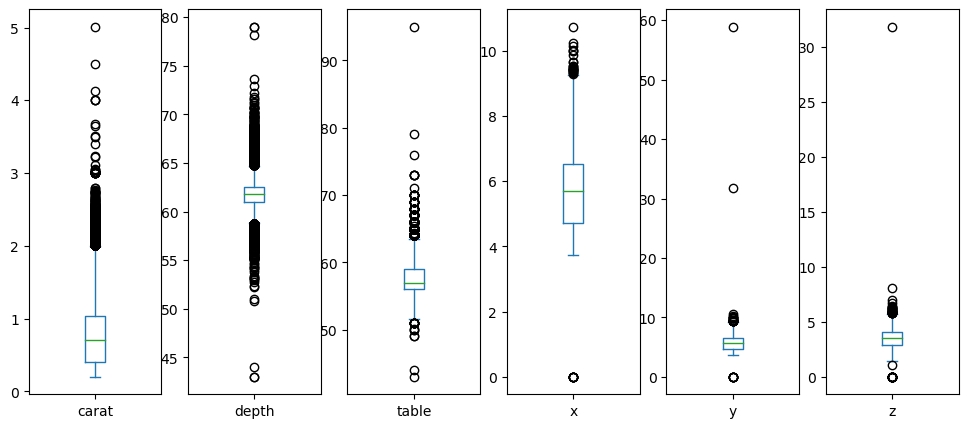

In [70]:
# Avaliando a variabilidade entre as variáveis: Carat = Peso Quil, depth = porcetagem profundidade, table = Largura Tab.
# x = comprimento, y = largura e z = profundidade

boxplot_colunas = ['carat', 'depth', 'table', 'x', 'y', 'z']
df_diam[boxplot_colunas].plot(kind='box', subplots=True, figsize= (12,5))

In [61]:
# Ajustando os conjuntos de treinamento e teste.
X = df_diam.drop('price', axis=1)
y = df_diam['price']

# Divida os dados em um conjunto de treinamento e testes (80% de treinamento, 20% de teste)

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalização
norm = StandardScaler()
X_treino = norm.fit_transform(X_treino)
X_teste = norm.transform(X_teste)

print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(43152, 9) (10788, 9) (43152,) (10788,)


In [62]:
# Criar, treinar modelos e resultados

# Modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_treino, y_treino)
linear_pred = linear_model.predict(X_teste)

# Modelo Lasso
lasso_model = Lasso()
lasso_model.fit(X_treino, y_treino)
lasso_pred = lasso_model.predict(X_teste)

# Modelo Árvore Decisão Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_treino, y_treino)
tree_pred = tree_model.predict(X_teste)

# Modelo Floresta Aleatória Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_treino, y_treino)
rf_pred = rf_model.predict(X_teste)

# Modelo K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_treino, y_treino)
knn_pred = knn_model.predict(X_teste)

# Modelo Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_treino, y_treino)
gb_pred = gb_model.predict(X_teste)

# Calcular métricas para avaliação
models = {
    "Regressão Linear": linear_pred,
    "Lasso": lasso_pred,
    "Árvore Decisão": tree_pred,
    "Floresta Aleatória": rf_pred,
    "K-Nearest Neighbors": knn_pred,
    "Gradient Boosting": gb_pred
}

# Crie listas para armazenar os resultados
model_names = []
mse_values = []
r2_values = []

# Adicione seus modelos e resultados às listas
model_names.extend(models.keys())

for model_name, predictions in models.items():
    mse = mean_squared_error(y_teste, predictions)
    r2 = r2_score(y_teste, predictions)
    mse_values.append(f'{mse:.2f}')
    r2_values.append(f'{r2:.2f}')

# Crie um DataFrame com os resultados
df_results = pd.DataFrame({
    "Modelo": model_names,
    "MSE": mse_values,
    "R²": r2_values
})

# Exiba a tabela
print(df_results)   


                Modelo         MSE    R²
0     Regressão Linear  1499636.69  0.91
1                Lasso  1499715.34  0.91
2       Árvore Decisão   531193.43  0.97
3   Floresta Aleatória   291109.42  0.98
4  K-Nearest Neighbors   507822.26  0.97
5    Gradient Boosting   371237.37  0.98


In [ ]:
O modelo baseado em floresta aleatória teve um desempenho mais satisfatório em relação ao demais, pois apresentou 
o maior R2(0,98) e menor MSE-erro quadrático médio(291109.42). 
O modelo GB também apresentou um R2(0,98), entretanto, seu MSE-erro quadrático médio foi um pouco maior(371054.51).